In [1]:
import matplotlib.pyplot as plt
import pickle
import os, sys
sys.path.append(os.path.join(os.getcwd(), '..')) # this is the ml_dadi dir
import plotting
from plotting import plot_accuracy_multi

In [6]:
# Load test datasets
data_names = ['full_no_log', 'full_log', 'exclude_log']
test_data = {}
for name in data_names:
    list_test_dict = pickle.load(open(f'data/test_data_{name}', 'rb'))
    test_data[name] = list_test_dict


In [3]:
# Load trained ML models
ml_models = ['rfr', 'mlpr_adam', 'mlpr_lbfgs']
ml_models_dict = {}
for model in ml_models:
    for name in data_names:
        list_models = pickle.load(open(f'data/list_{model}_{name}', 'rb'))
        ml_models_dict[f'{model}_{name}'] = list_models


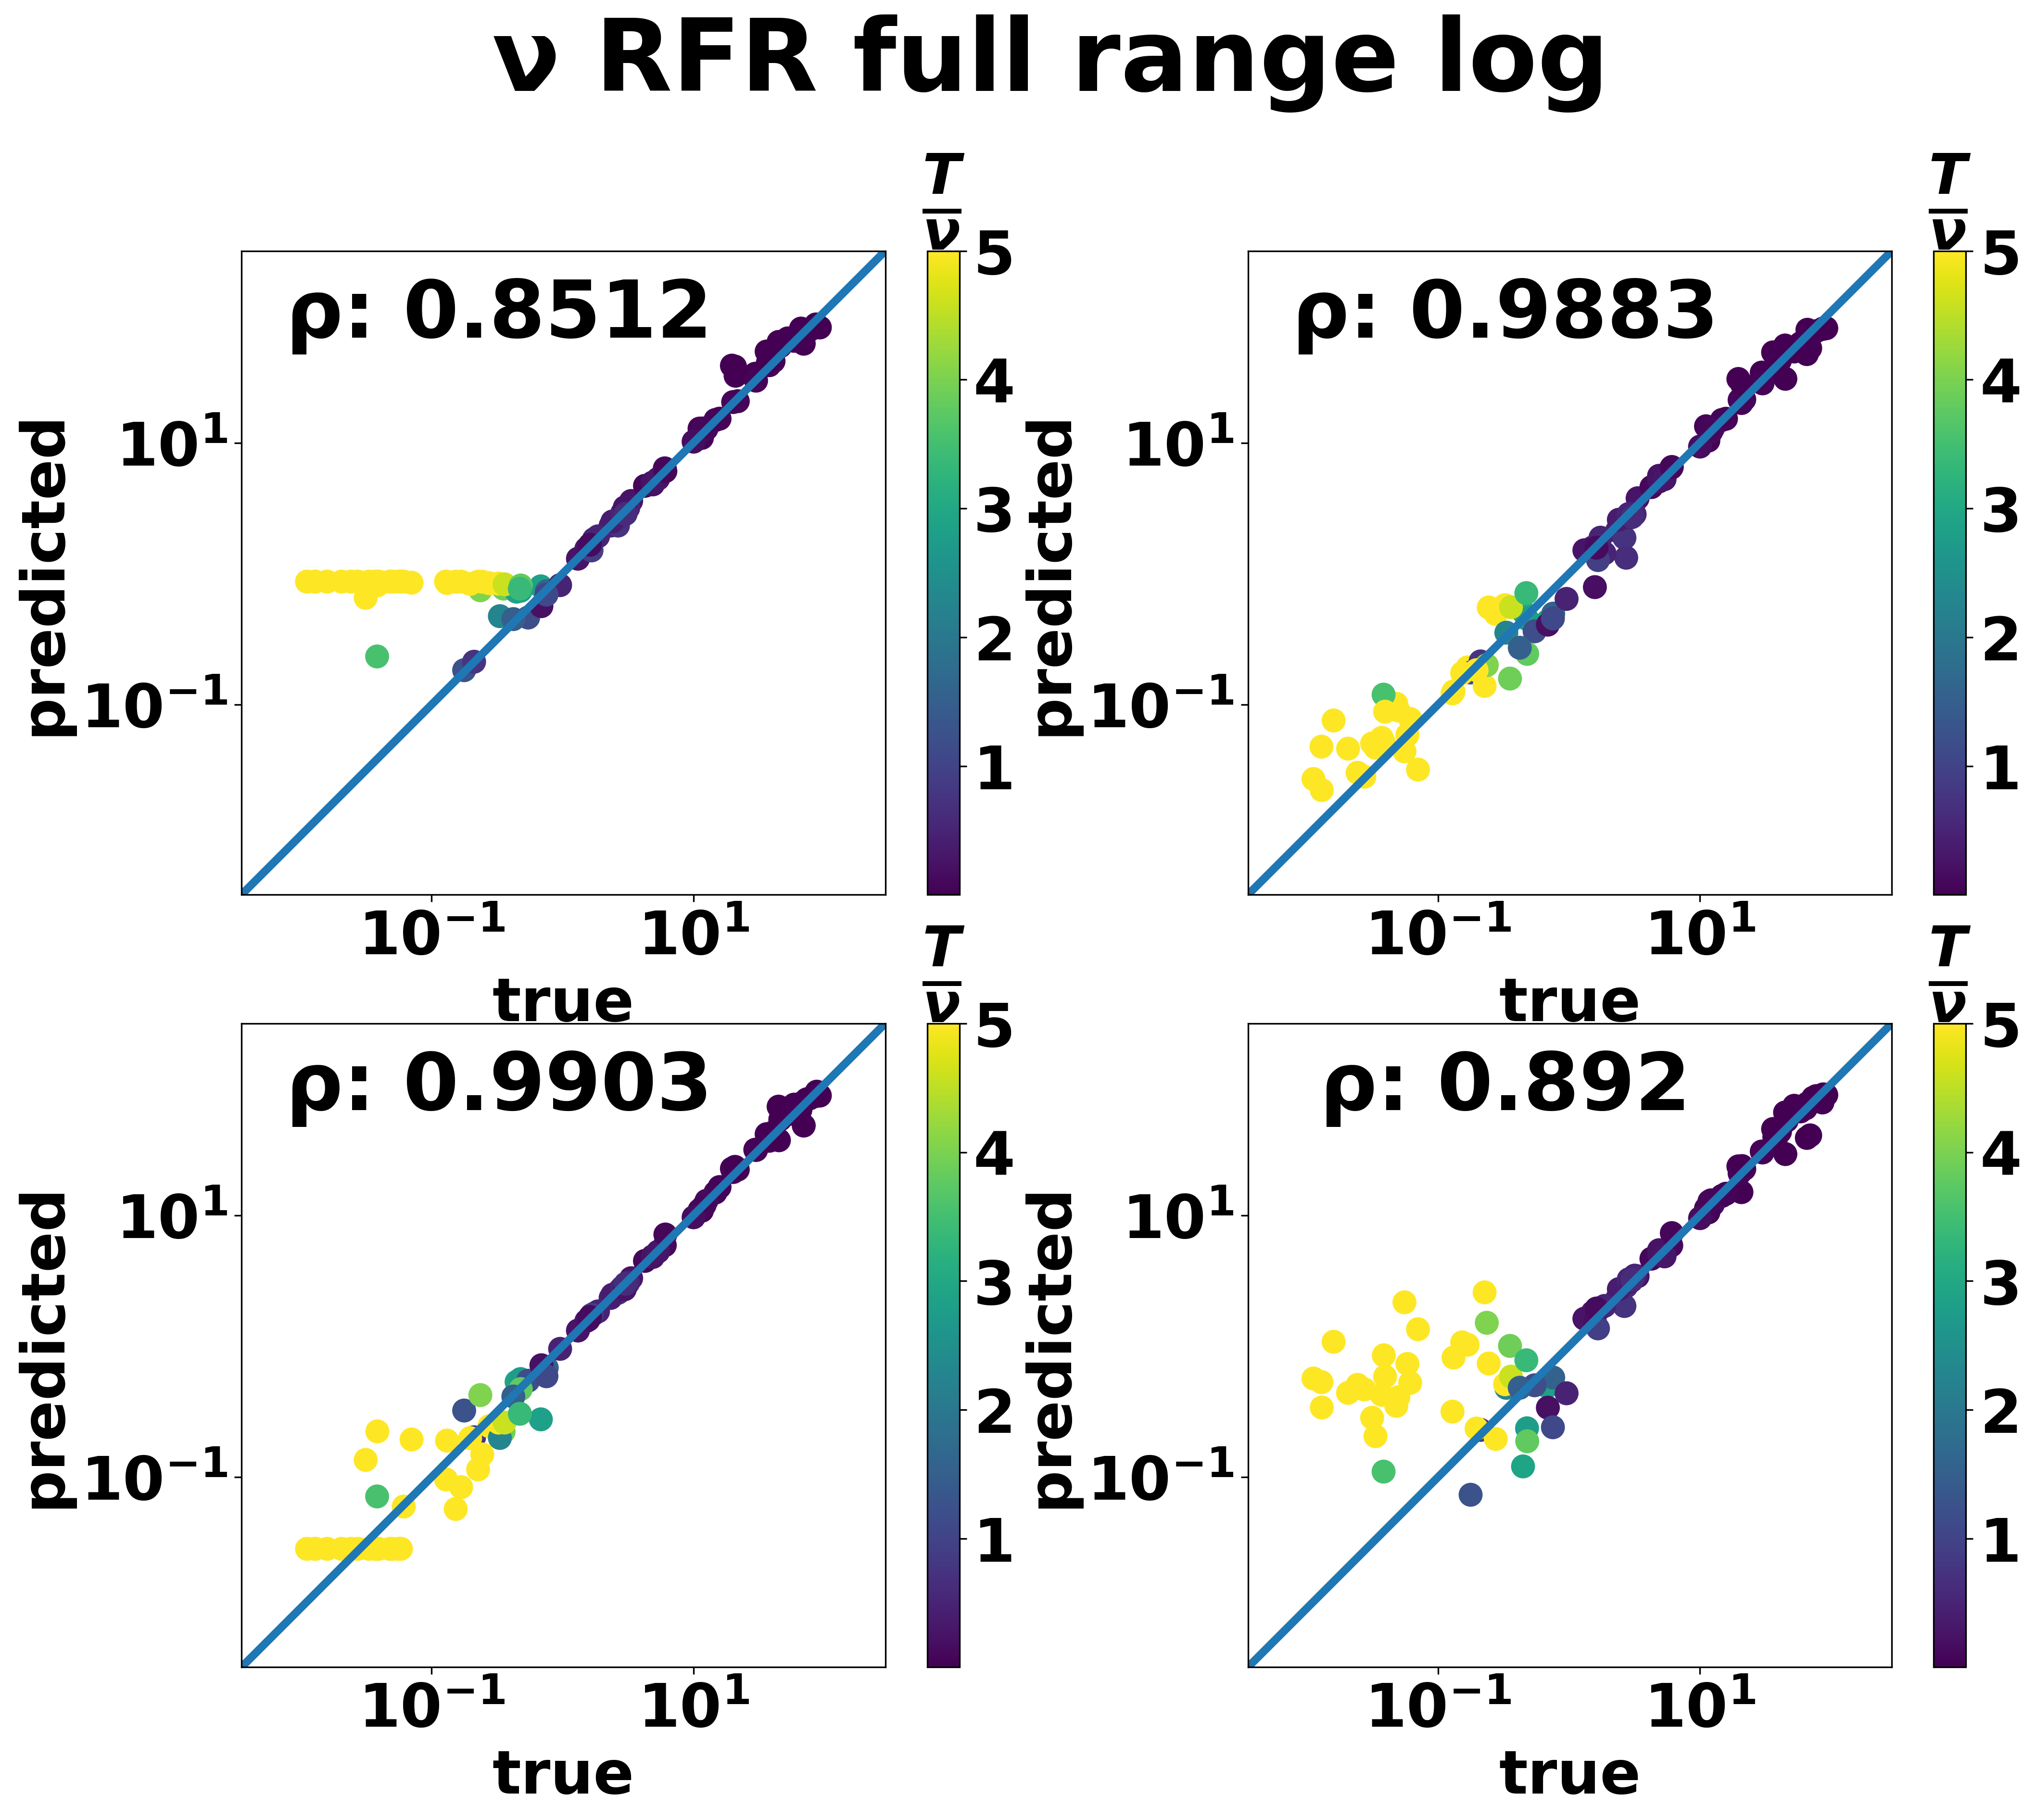

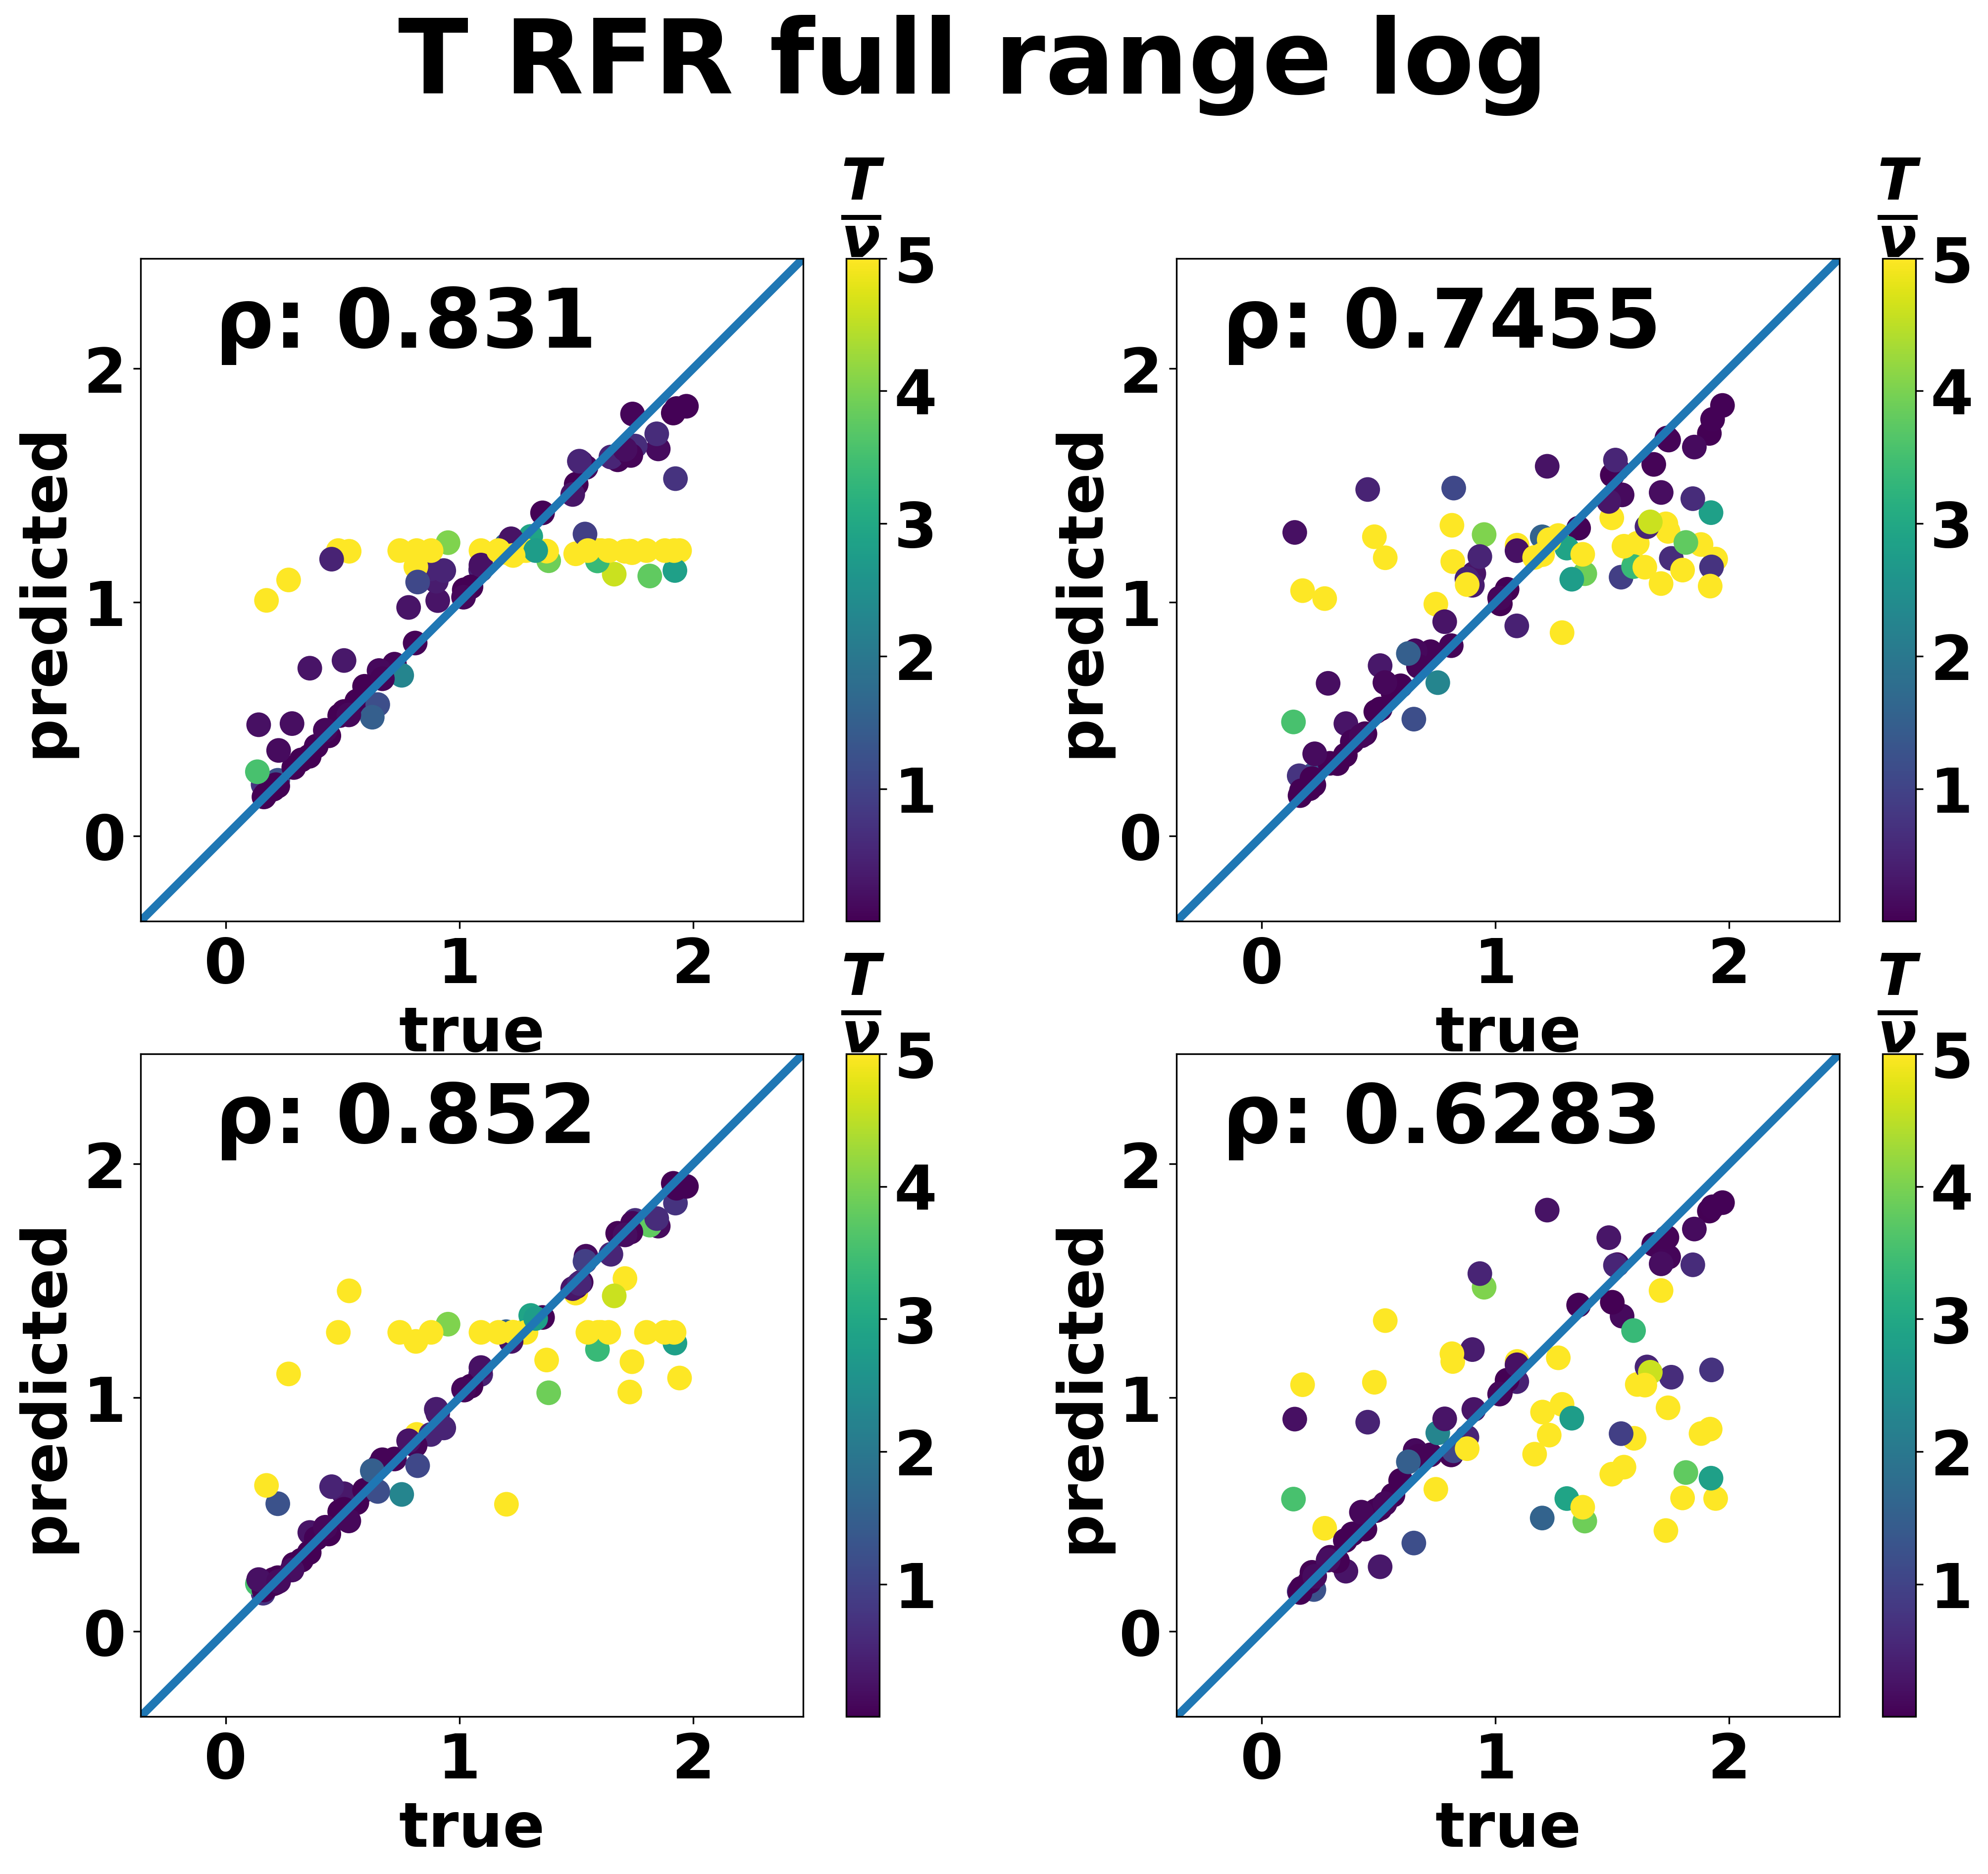

In [7]:
# Plot RFR 2x2 training & testing var, with colorbar, for full range
list_test_dict = test_data['full_log']
list_test_dict_clipped = [list_test_dict[0], list_test_dict[2]]
list_rfr = ml_models_dict['rfr_full_log']
list_rfr_clipped = [list_rfr[0], list_rfr[2]]
params = ['ν', 'T']
title = 'RFR full range log'
logs = [True, False]
size = ((50, 80), (30, 80), (15, 4, 40), (16.5, 13))
# size_format = ( (title_font_size, title_pad), (axis_font_size, axis_pad),
#                   (single_size_tuple), fig_size)
# single_size_tuple = (dots_size, line_width, font_size)
plot_accuracy_multi(list_rfr_clipped, list_test_dict_clipped,
                    logs, params, size, title, r2=False, c=True)
# save fig
# for i in range(len(params)):
#     plt.figure(i+1).savefig(f'results/RFR/{params[i]}_full_2x2.png')


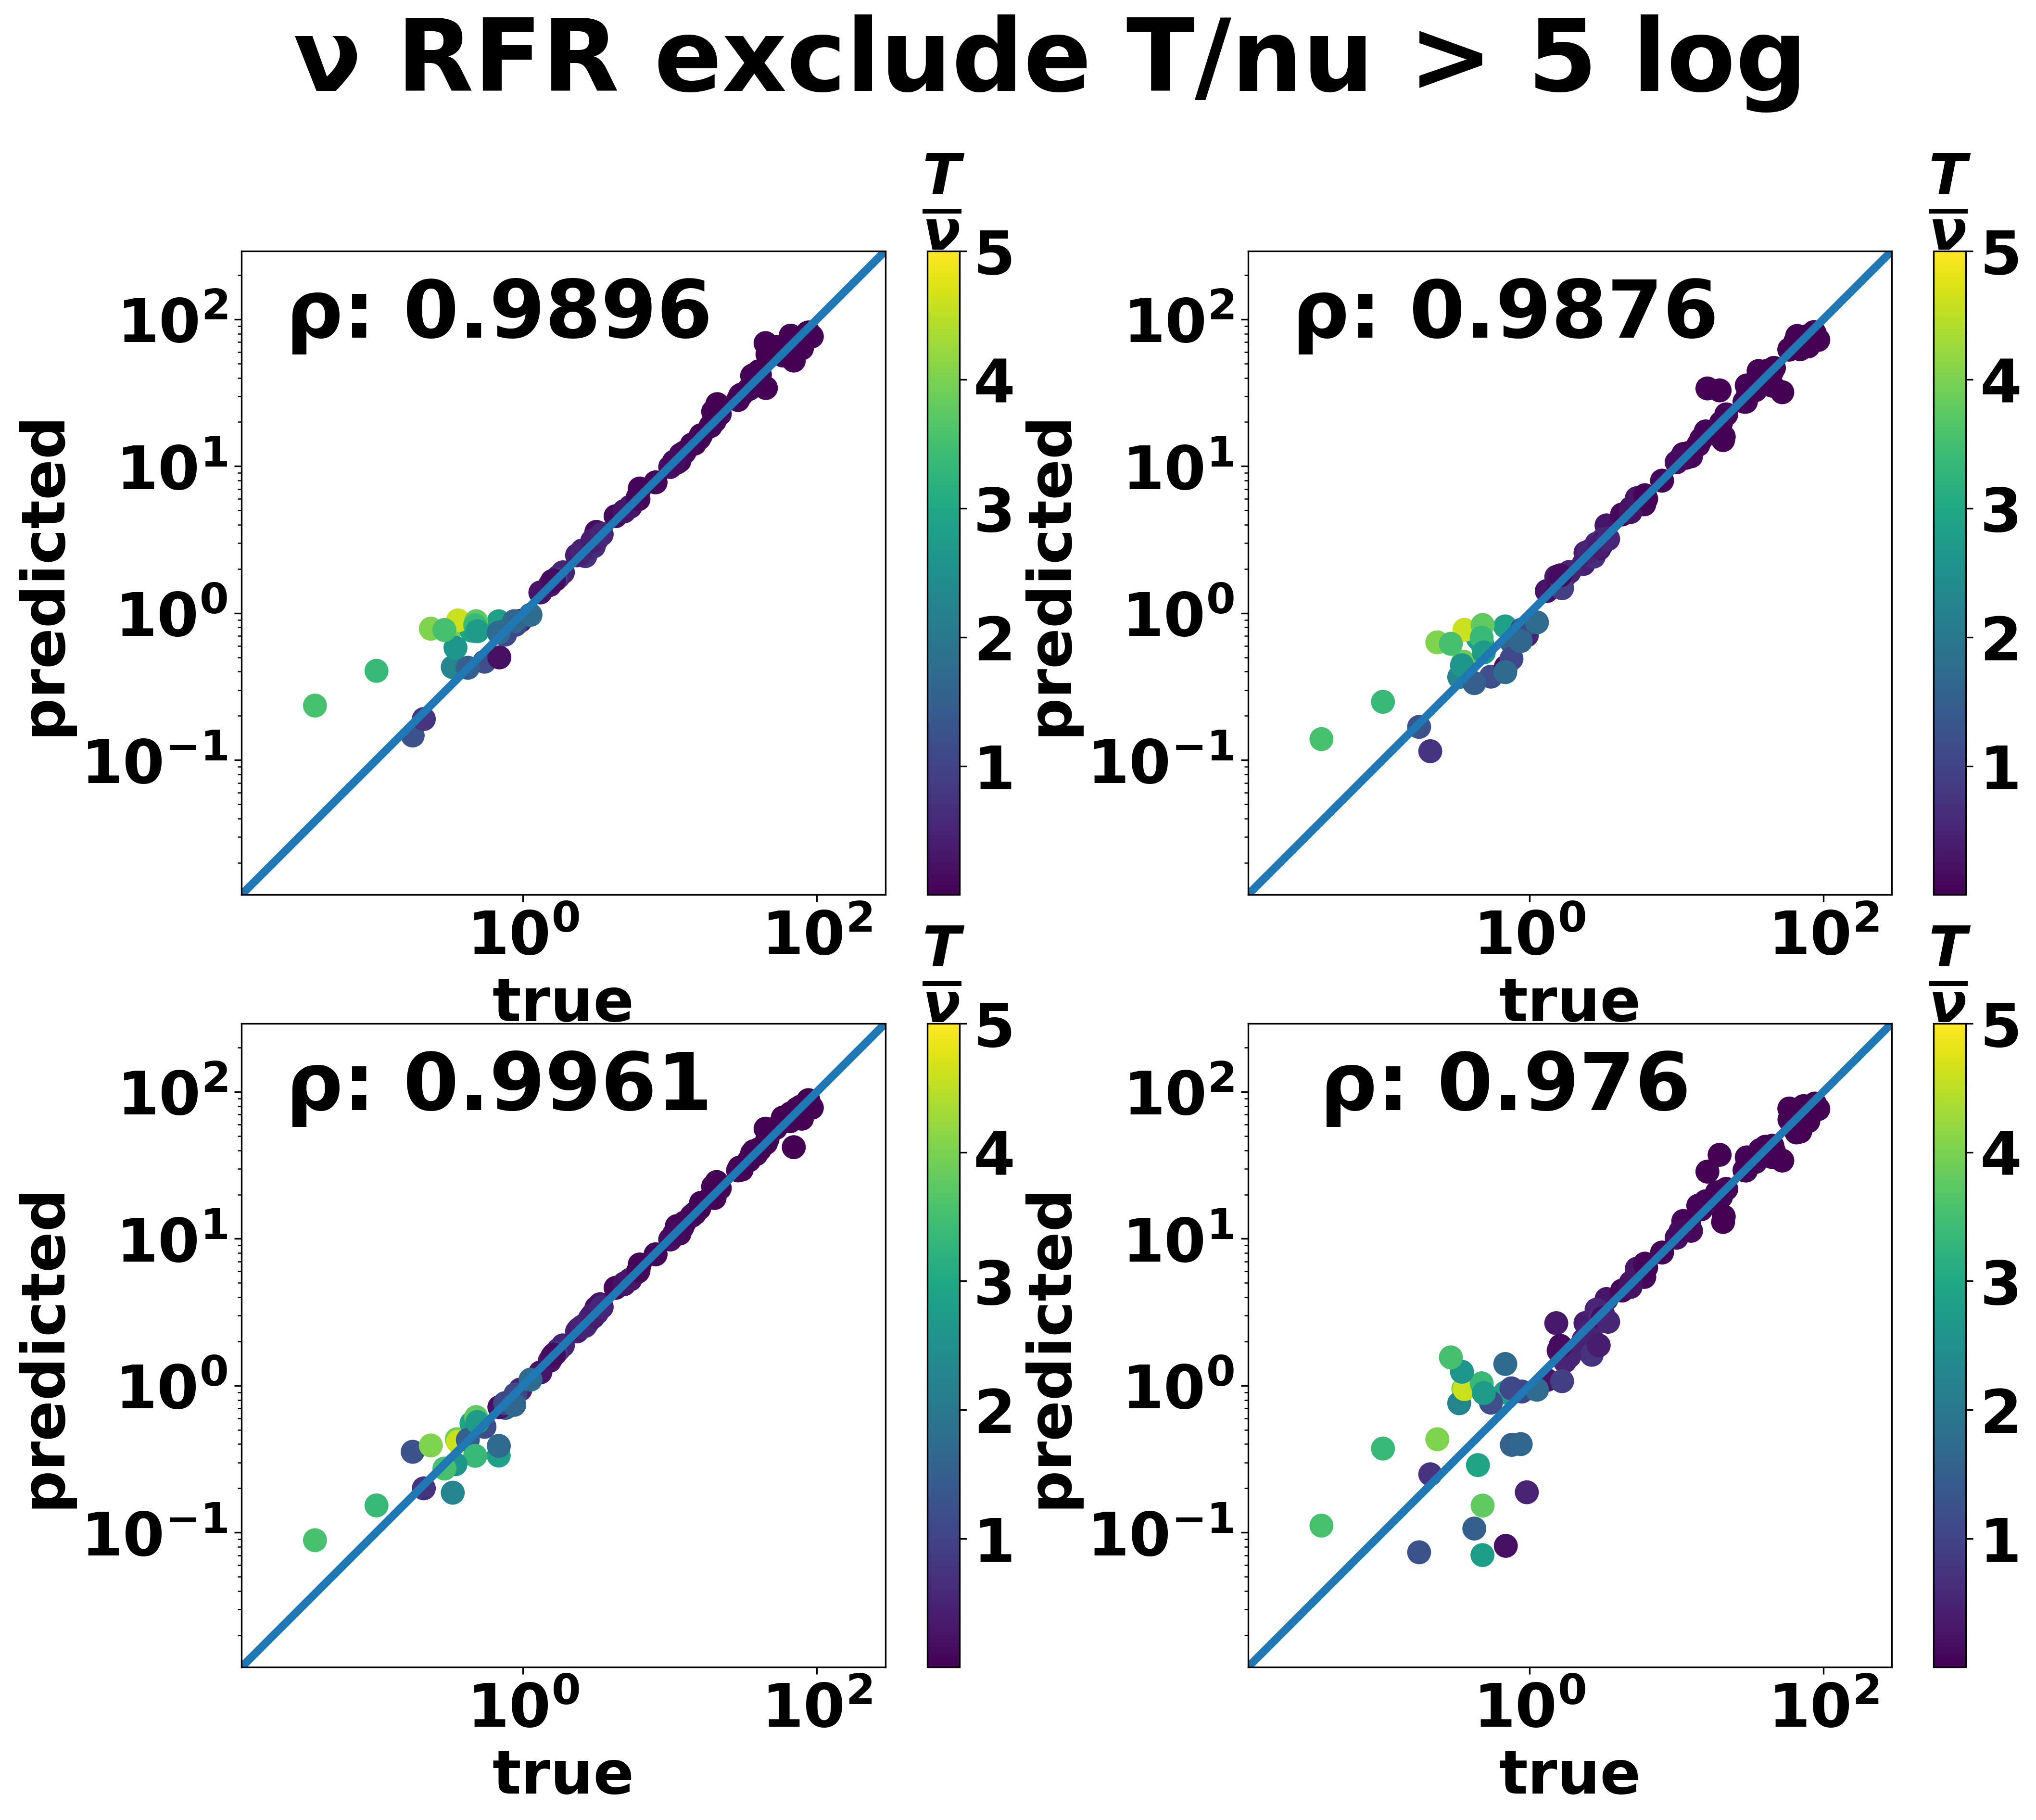

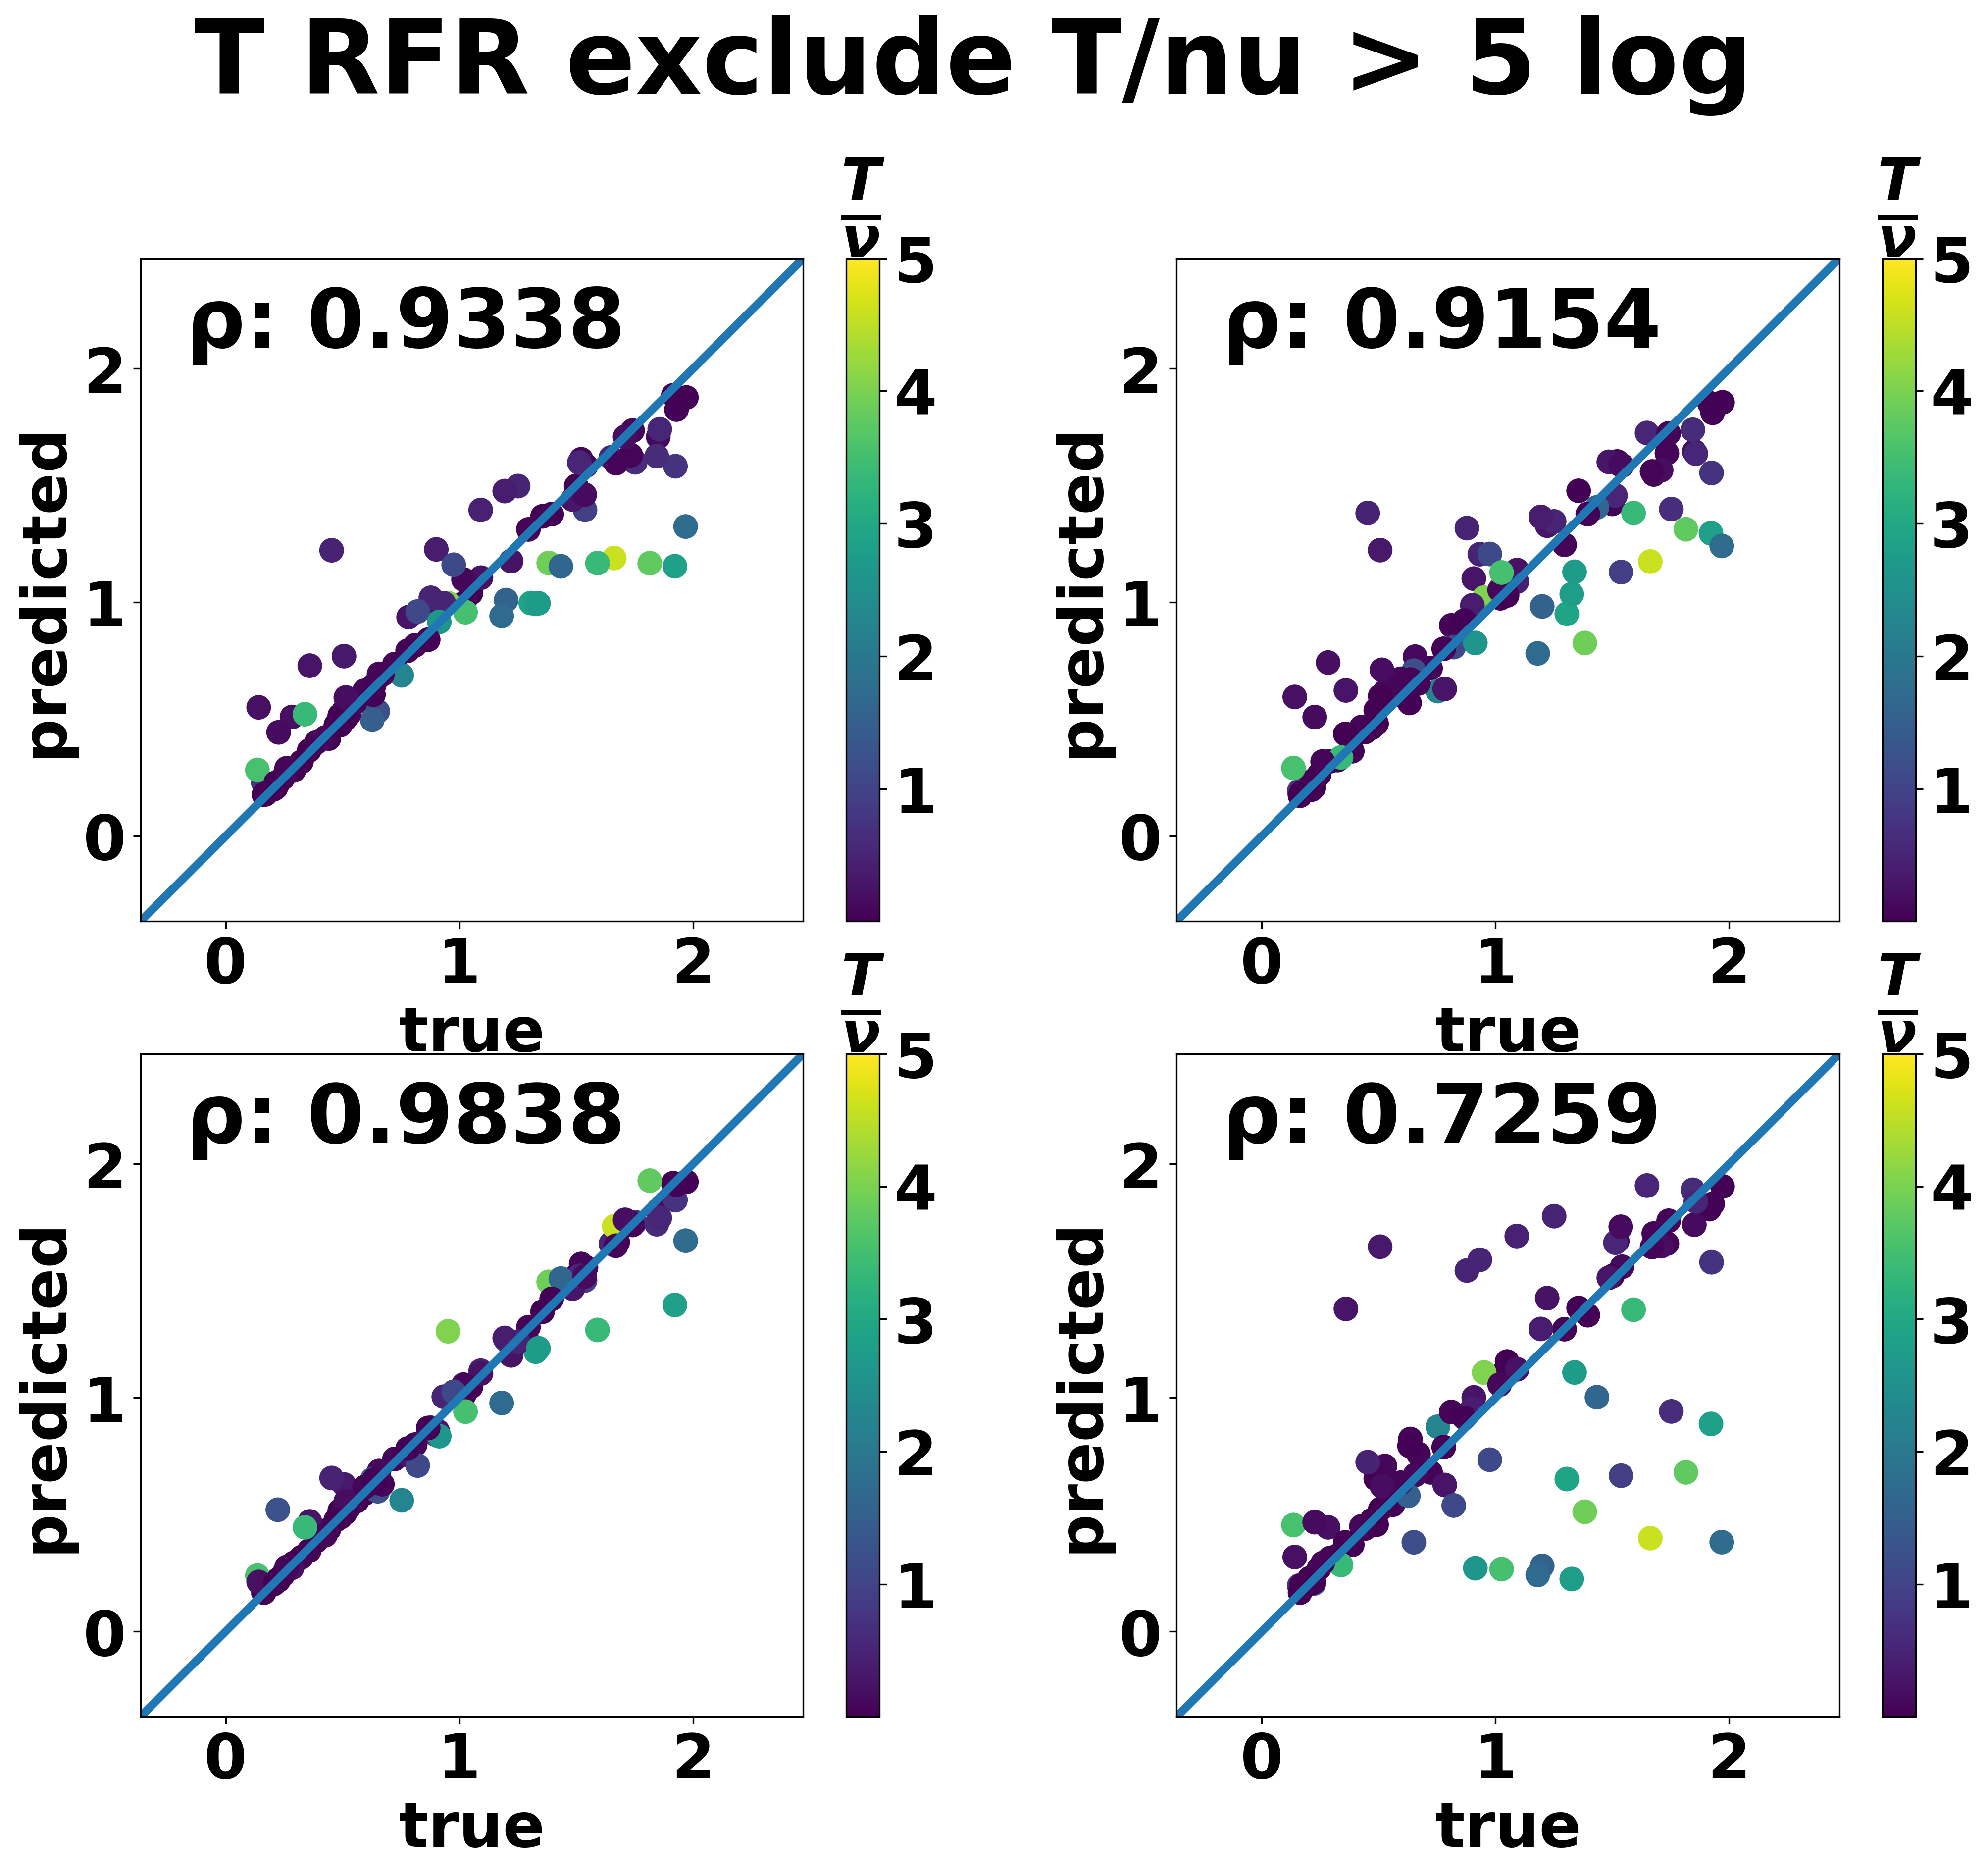

In [8]:
# Plot RFR 2x2 training & testing var, with colorbar, for T/nu > 5 exclusion
list_test_dict = test_data['exclude_log']
list_test_dict_clipped = [list_test_dict[0], list_test_dict[2]]
list_rfr = ml_models_dict['rfr_exclude_log']
list_rfr_clipped = [list_rfr[0], list_rfr[2]]
params = ['ν', 'T']
title = 'RFR exclude T/nu > 5 log'
logs = [True, False]
size = ((50, 80), (30, 80), (15, 4, 40), (16.5, 13))
# size_format = ( (title_font_size, title_pad), (axis_font_size, axis_pad),
#                   (single_size_tuple), fig_size)
# single_size_tuple = (dots_size, line_width, font_size)
plot_accuracy_multi(list_rfr_clipped, list_test_dict_clipped,
                    logs, params, size, title, r2=False, c=True)
# save fig
# for i in range(len(params)):
#     plt.figure(i+1).savefig(f'results/RFR/{params[i]}_full_2x2.png')

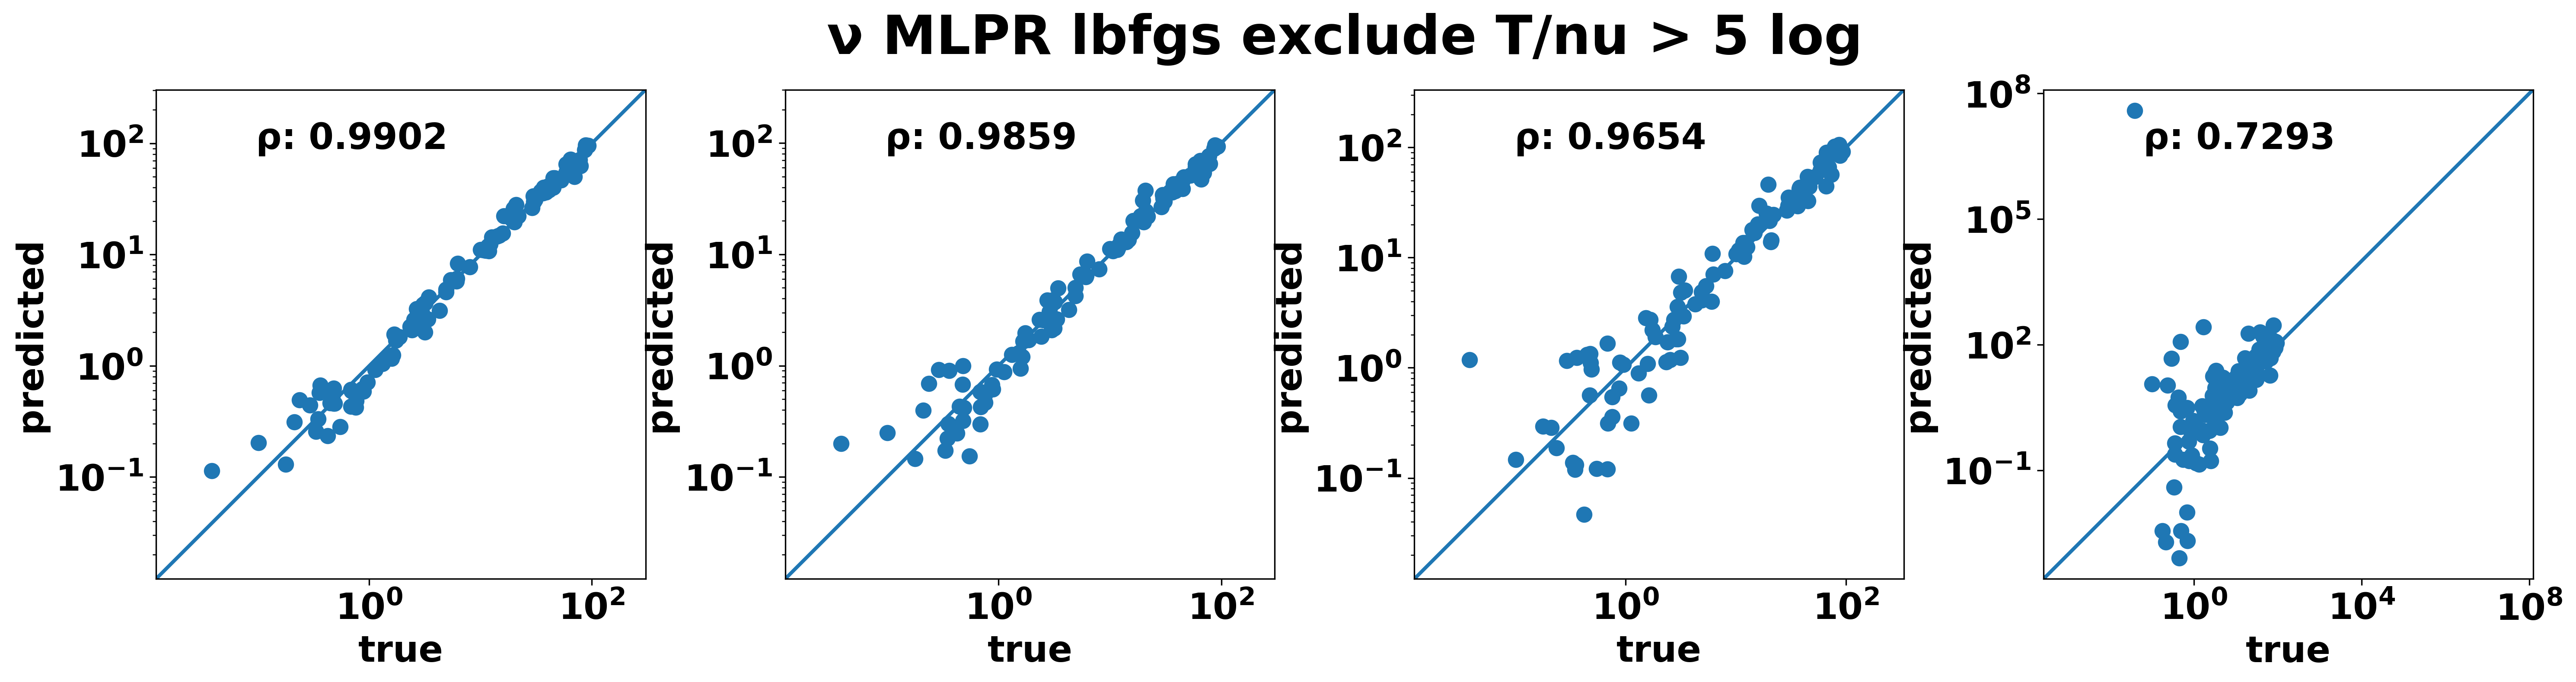

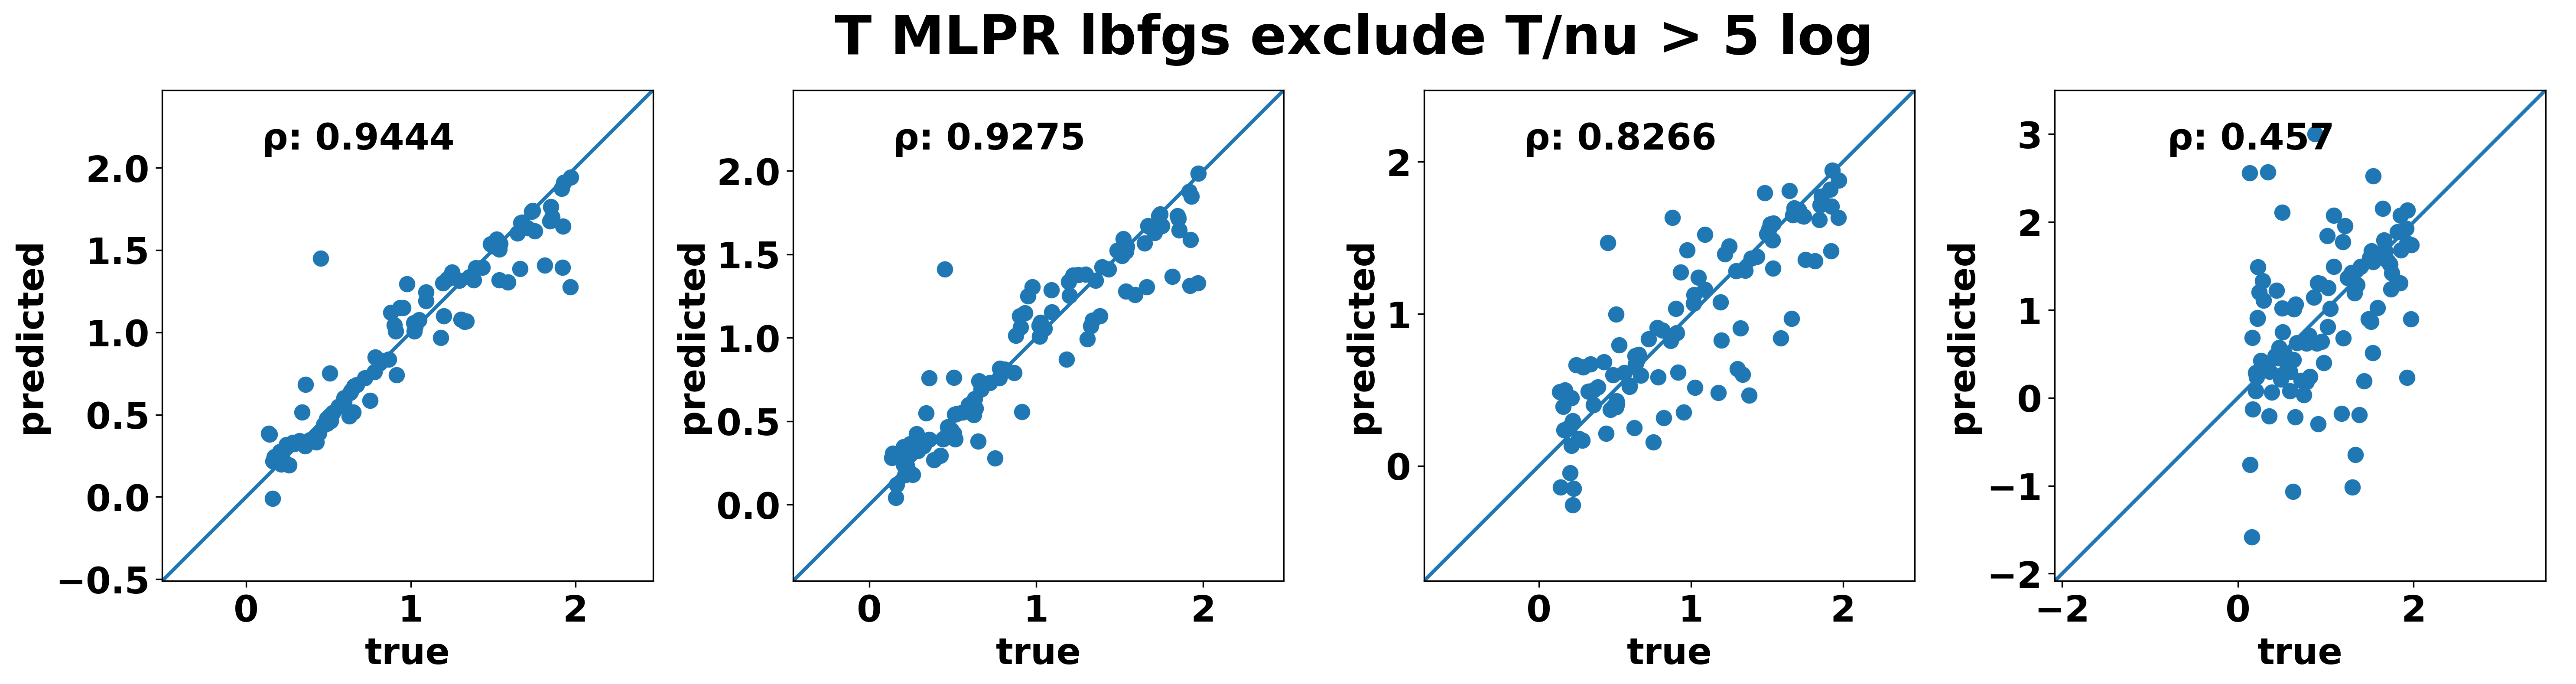

In [14]:
# Plot 1x4 MLPR lbfgs
list_test_dict = test_data['exclude_log']
list_mlpr_lbfgs = ml_models_dict['mlpr_lbfgs_exclude_log']
mlpr_lbfgs_1 = list_mlpr_lbfgs[0]

params = ['ν', 'T']
title = 'MLPR lbfgs exclude T/nu > 5 log'
logs = [True, False]
size = ((30, 20), (20, 80), (8, 2, 20), (24, 5))
# size_format = ( (title_font_size, title_pad), (axis_font_size, axis_pad),
#                   (single_size_tuple), fig_size)
# single_size_tuple = (dots_size, line_width, font_size)
plot_accuracy_multi([mlpr_lbfgs_1], list_test_dict, logs,
                    params, size, title, r2=False)
# # save fig
# for i in range(len(params)):
#     plt.figure(i+1).savefig(f'results/MLPR/{params[i]}_lbfgs_1x4.png')


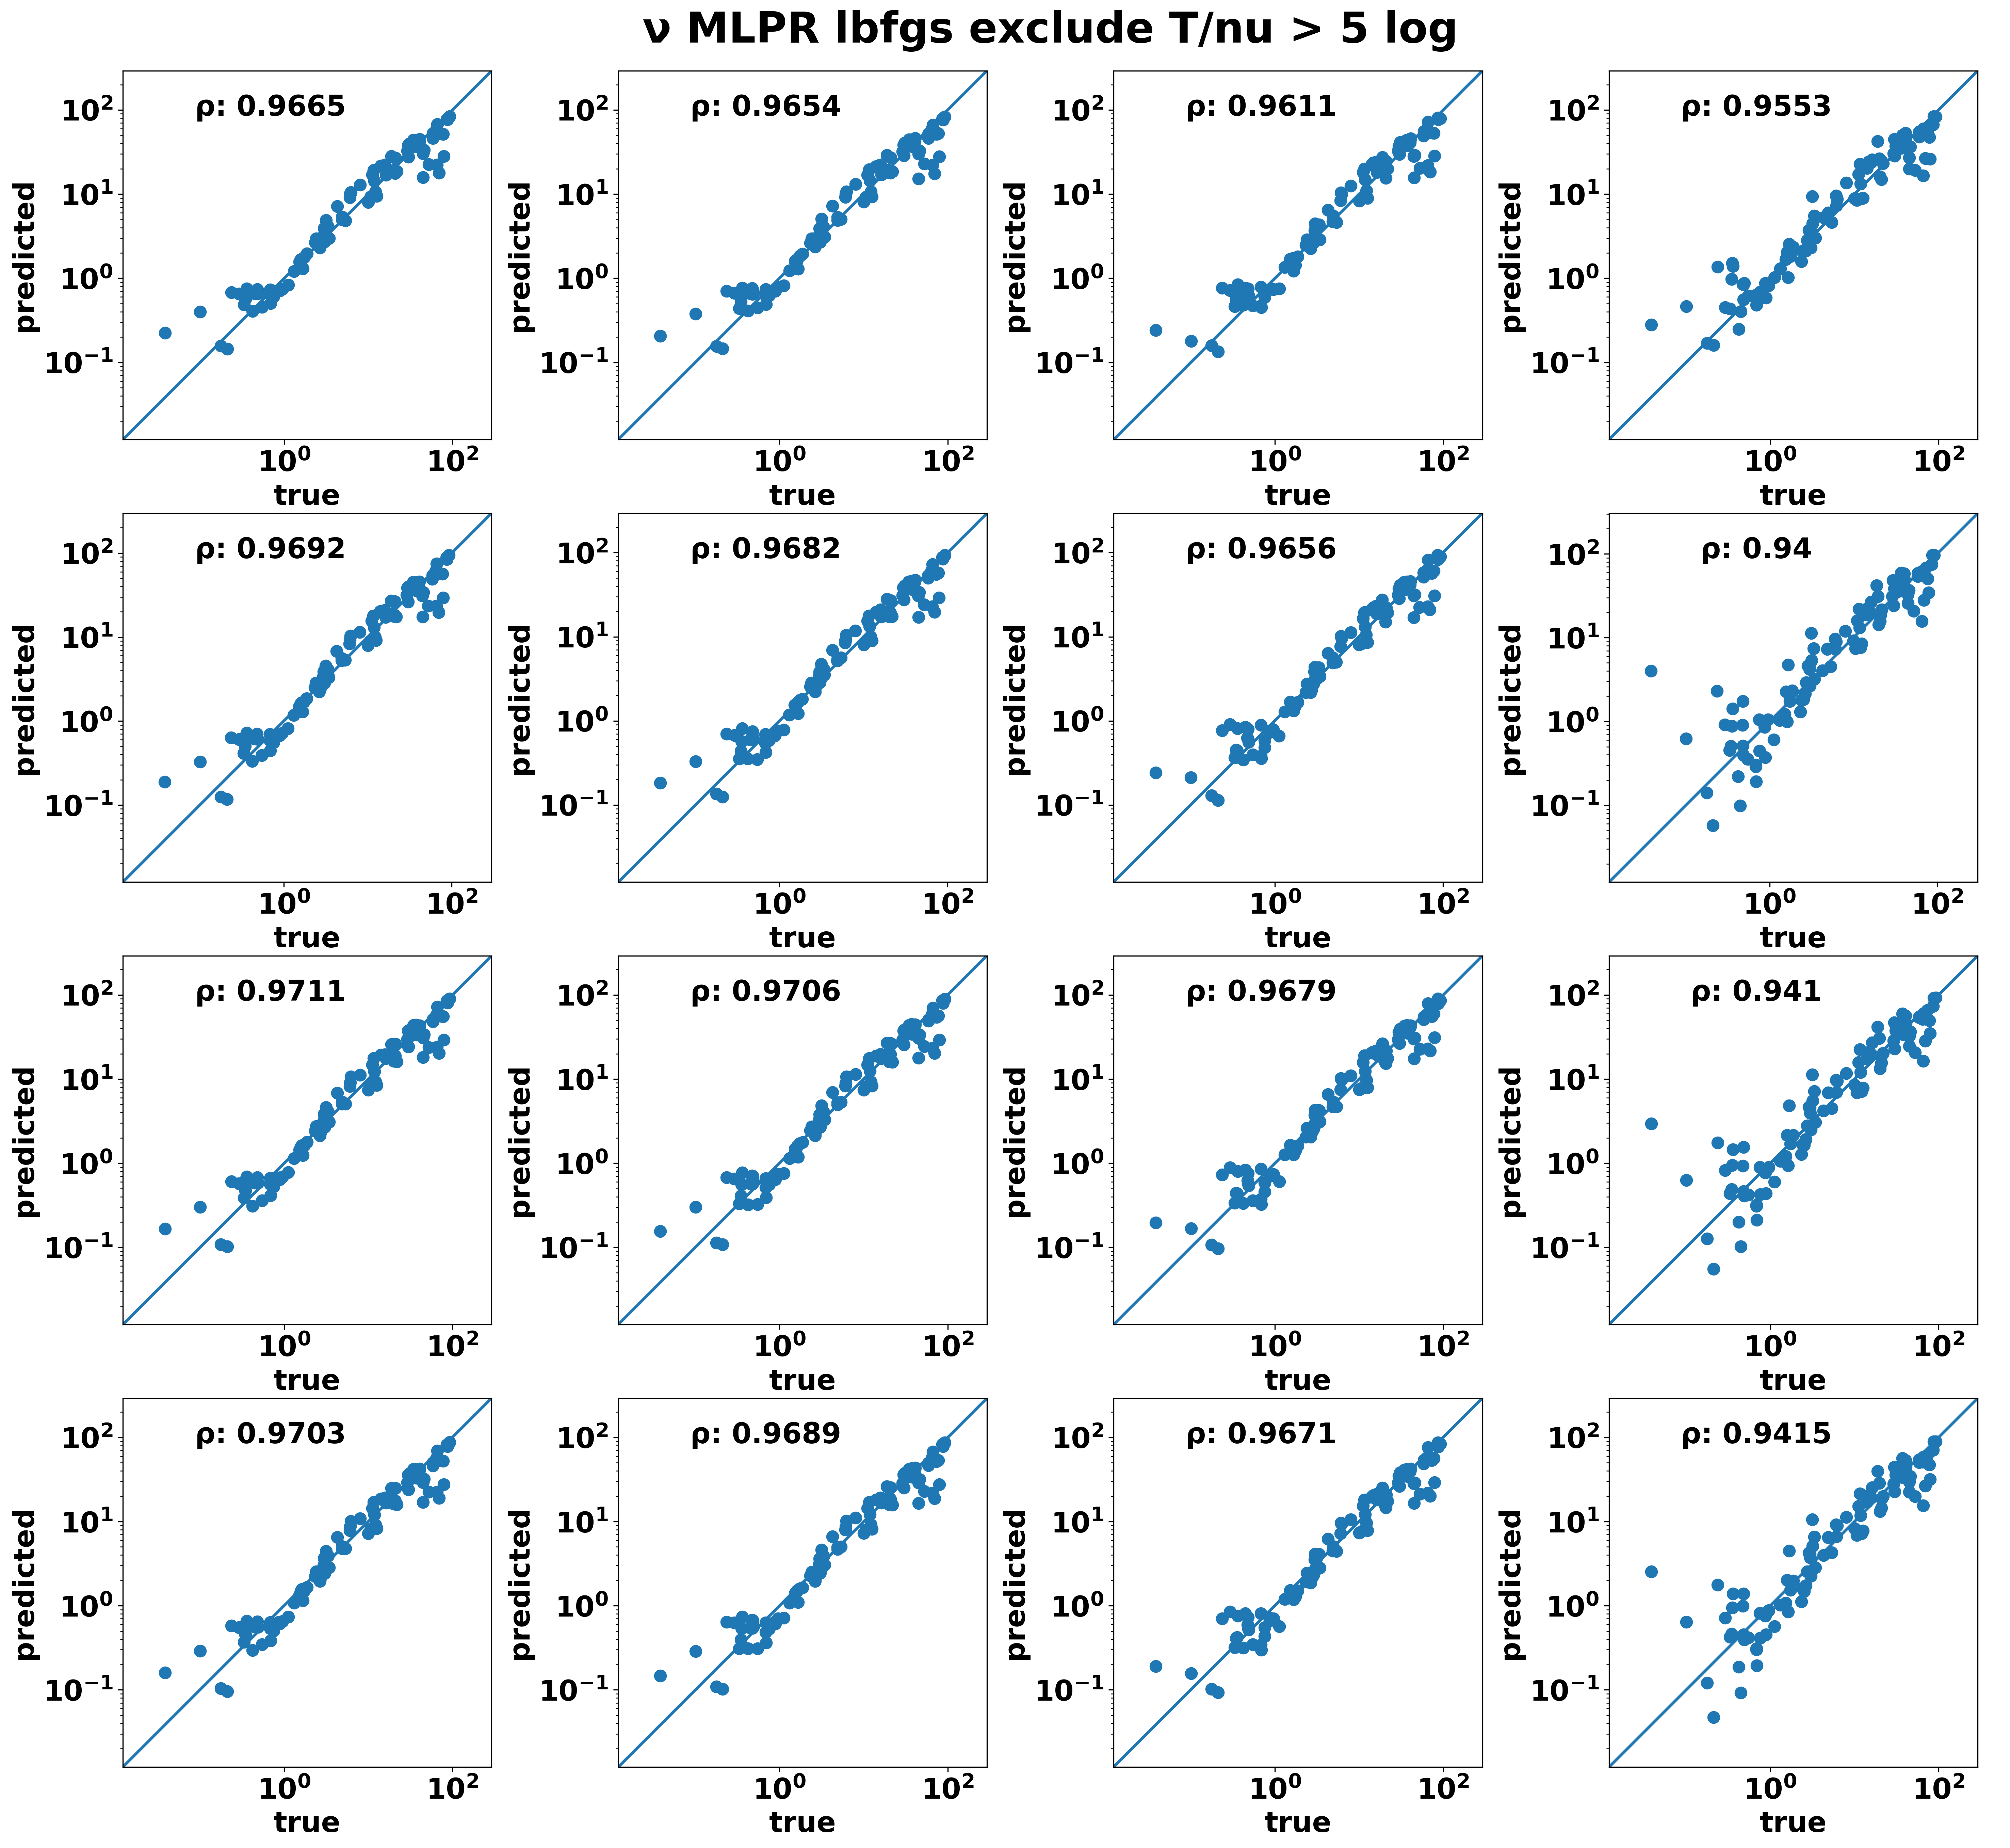

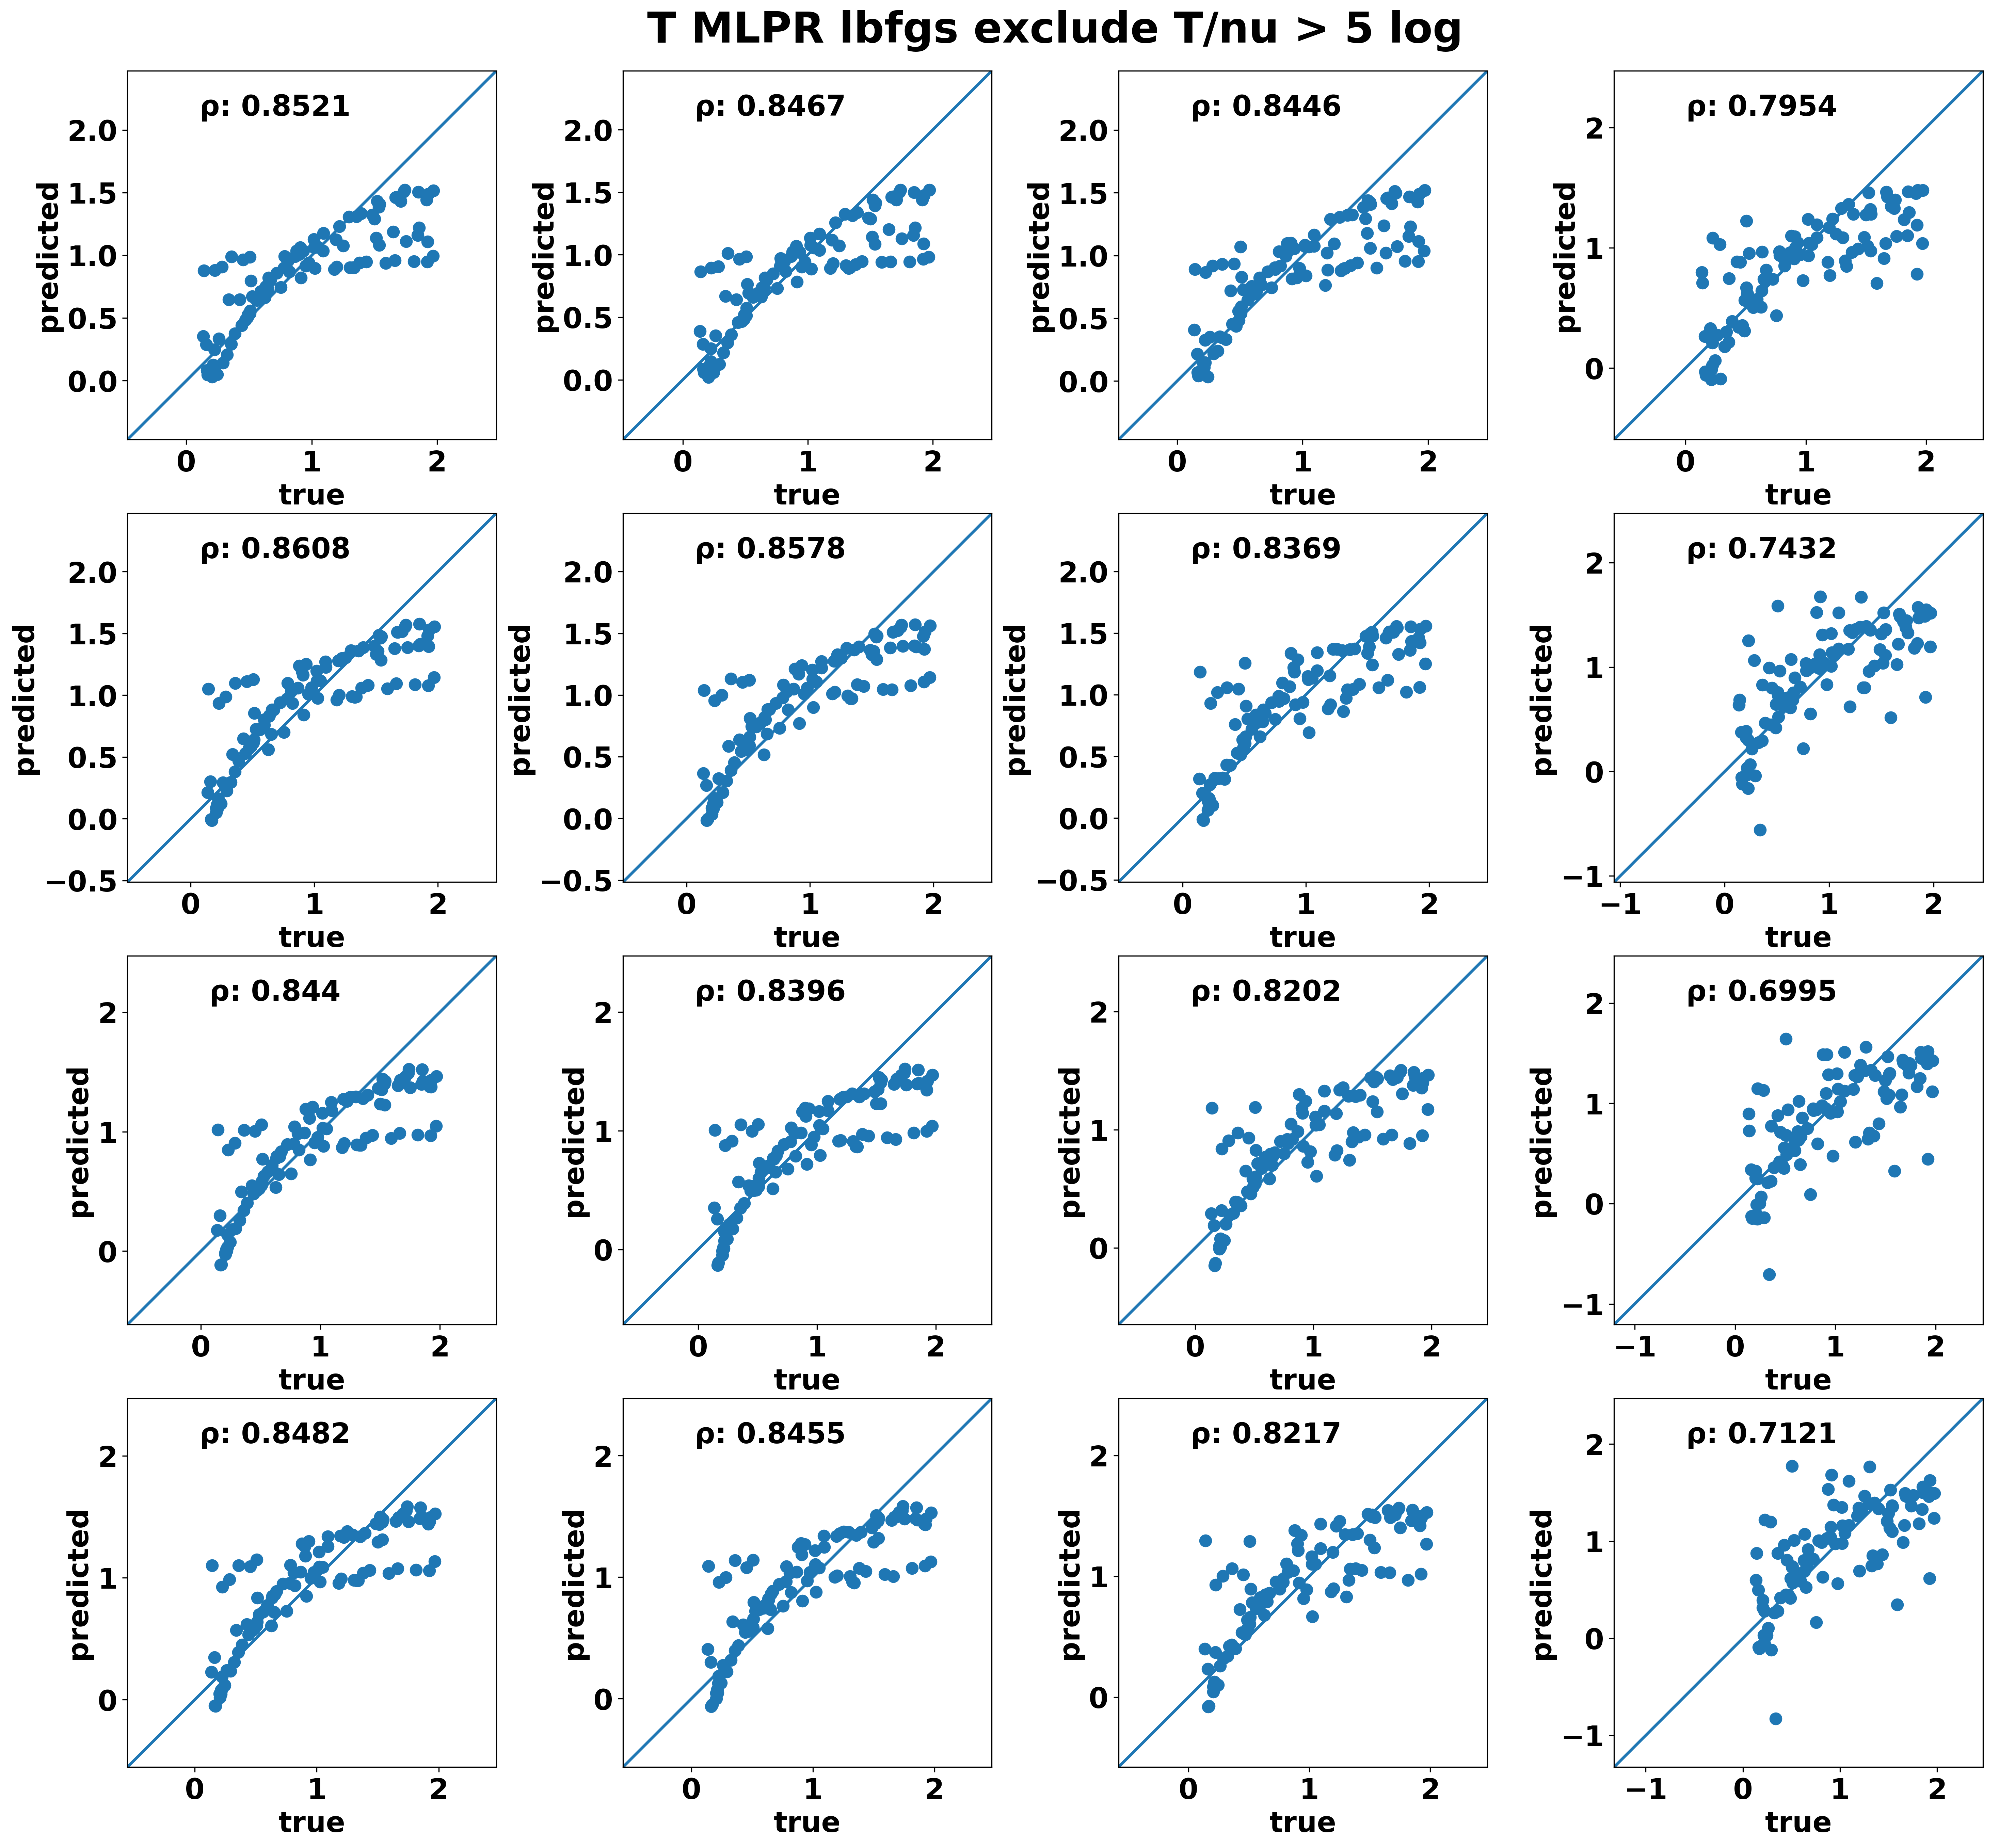

In [15]:
# Plot 4x4 MLPR adam
list_test_dict = test_data['exclude_log']
list_mlpr_adam = ml_models_dict['mlpr_adam_exclude_log']

params = ['ν', 'T']
model_name = 'MLPR adam exclude T/nu > 5 log'
logs = [True, False]
size = ((30, 20), (20, 80), (8, 2, 20), (24, 22))
# size_format = ( (title_font_size, title_pad), (axis_font_size, axis_pad),
#                   (single_size_tuple), fig_size)
# single_size_tuple = (dots_size, line_width, font_size)
plot_accuracy_multi(list_mlpr_adam, list_test_dict, logs,
                    params, size, title, r2=False)
# # save fig
# for i in range(len(params)):
#     plt.figure(i+1).savefig(f'results/MLPR/{params[i]}_adam_4x4.png')
